In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('../data/raw/train_data.csv')

df.replace(-1.0, np.nan, inplace=True)
df.replace('-1', np.nan, inplace=True)

# Convert date columns to datetime
df['launch_date'] = pd.to_datetime(df['launch_date'])
df['date'] = pd.to_datetime(df['date'])
df['ind_launch_date'] = pd.to_datetime(df['ind_launch_date'], errors='coerce')

# Convert lists from strings to actual lists
import ast
df['indication'] = df['indication'].apply(ast.literal_eval)

df.to_csv('../data/intermig/train_data-withNaNs.csv', index=False)
df.head()

,brand,che_pc_usd,che_perc_gdp,cluster_nl,corporation,country,launch_date,date,drug_id,ind_launch_date,indication,insurance_perc_che,population,prev_perc,price_month,price_unit,public_perc_che,therapeutic_area,target
0,BRAND_354E,1.209114,1.665879,BRAND_354E_COUNTRY_88A3,CORP_D524,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_8795,NaT,[IND_C3B6],1.893333,1.008039,0.028367,1.006444,1.013784,1.835821,THER_AREA_980E,1.000784
1,BRAND_626D,NaN,NaN,BRAND_626D_COUNTRY_8B47,CORP_01C7,COUNTRY_8B47,2014-06-01,2014-06-01,DRUG_ID_E66E,2014-09-01,"[IND_1590, IND_ECAC]",NaN,1.023562,0.000047,NaN,1.626677,NaN,THER_AREA_96D7,1.000000
2,BRAND_45D9,1.209114,1.665879,BRAND_45D9_COUNTRY_88A3,CORP_39F7,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_F272,NaT,[IND_B2EF],1.893333,1.008039,0.001502,NaN,3.144874,1.835821,THER_AREA_96D7,1.002258
3,BRAND_D724,1.851280,2.051770,BRAND_D724_COUNTRY_445D,CORP_711A,COUNTRY_445D,2014-06-01,2014-06-01,DRUG_ID_1D4E,NaT,[IND_BAFB],1.000000,1.253186,0.001304,NaN,1.213446,1.805970,THER_AREA_6CEE,1.068761
4,BRAND_4887,1.791199,2.059130,BRAND_4887_COUNTRY_D8B0,CORP_443D,COUNTRY_D8B0,2014-06-01,2014-06-01,DRUG_ID_AA88,NaT,[IND_3F31],2.013333,1.639352,0.054467,1.018589,1.008708,1.880597,THER_AREA_6CEE,1.036312


In [23]:
# Calculate the difference in months
df['months_since_launch'] = (
    (df['date'].dt.year - df['launch_date'].dt.year) * 12 +
    (df['date'].dt.month - df['launch_date'].dt.month)
)

# If you want to account for the day of the month
df['months_since_launch'] -= df['date'].dt.day < df['launch_date'].dt.day

# Convert to integer type
df['months_since_launch'] = df['months_since_launch'].astype(int)

print('Shape:', df.shape)
# Display the updated DataFrame
df.head()

Shape: (118917, 21)


,brand,che_pc_usd,che_perc_gdp,cluster_nl,corporation,country,launch_date,date,drug_id,ind_launch_date,...,insurance_perc_che,population,prev_perc,price_month,price_unit,public_perc_che,therapeutic_area,target,months_since_launch,year
0,BRAND_354E,1.209114,1.665879,BRAND_354E_COUNTRY_88A3,CORP_D524,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_8795,NaT,...,1.893333,1.008039,0.028367,1.006444,1.013784,1.835821,THER_AREA_980E,1.000784,0,2014
1,BRAND_626D,NaN,NaN,BRAND_626D_COUNTRY_8B47,CORP_01C7,COUNTRY_8B47,2014-06-01,2014-06-01,DRUG_ID_E66E,2014-09-01,...,NaN,1.023562,0.000047,NaN,1.626677,NaN,THER_AREA_96D7,1.000000,0,2014
2,BRAND_45D9,1.209114,1.665879,BRAND_45D9_COUNTRY_88A3,CORP_39F7,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_F272,NaT,...,1.893333,1.008039,0.001502,NaN,3.144874,1.835821,THER_AREA_96D7,1.002258,0,2014
3,BRAND_D724,1.851280,2.051770,BRAND_D724_COUNTRY_445D,CORP_711A,COUNTRY_445D,2014-06-01,2014-06-01,DRUG_ID_1D4E,NaT,...,1.000000,1.253186,0.001304,NaN,1.213446,1.805970,THER_AREA_6CEE,1.068761,0,2014
4,BRAND_4887,1.791199,2.059130,BRAND_4887_COUNTRY_D8B0,CORP_443D,COUNTRY_D8B0,2014-06-01,2014-06-01,DRUG_ID_AA88,NaT,...,2.013333,1.639352,0.054467,1.018589,1.008708,1.880597,THER_AREA_6CEE,1.036312,0,2014


## A. Drug-related data

In [73]:
df['year'] = df['date'].dt.year.astype('Int64')  # Using 'Int64' for nullable integers
drugsdf = df[['drug_id', 'launch_date', 'year', 'indication', 'prev_perc', 'country', 'population', 'price_unit', 'price_month', 'therapeutic_area']]
drugsdf = drugsdf.sort_values(by=['drug_id', 'year'])

# ME FALLAN prev_perc, price_unit. EL RESTO TIENEN GRANULARIDAD ANUAL
for field in ['prev_perc', 'price_unit']:
    print(f"\nAnalyzing field: '{field}'")
    
    # Group by ['drug_id', 'country', 'year'] and count unique values in the current field
    field_counts = drugsdf.groupby(['drug_id', 'country', 'year'])[field].nunique().reset_index(name='nonunique_vals')
    
    # Identify groups with more than one unique value in the current field
    multiple_yearly = field_counts[field_counts['nonunique_vals'] > 1]
    
    # Number of groups with non-unique values
    num_nonunique = multiple_yearly.shape[0]
    print(f"Number of groups with multiple unique '{field}' values:", num_nonunique)
    
    # Optionally, display some of these problematic groups
    print(f"\nSample groups with multiple '{field}' values:")
    print(multiple_yearly.head())
    
    # Merge to get the subset of data with non-unique groups
    filtered_df = drugsdf.merge(multiple_yearly, on=['drug_id', 'country', 'year'])
    
    # Calculate the standard deviation of the field within each non-unique group
    std_devs = filtered_df.groupby(['drug_id', 'country', 'year'])[field].std().reset_index(name='std_dev')
    
    # Calculate summary statistics of the standard deviations
    average_std = std_devs['std_dev'].mean()
    median_std = std_devs['std_dev'].median()
    max_std = std_devs['std_dev'].max()
    min_std = std_devs['std_dev'].min()
    
    print(f"\nStandard Deviation Statistics for '{field}' in Non-Unique Groups:")
    print(f"Average Standard Deviation: {average_std:.4f}")
    print(f"Median Standard Deviation: {median_std:.4f}")
    print(f"Maximum Standard Deviation: {max_std:.4f}")
    print(f"Minimum Standard Deviation: {min_std:.4f}")
    
    # Optionally, display the first few standard deviations
    print(f"\nSample Standard Deviations for '{field}' in Non-Unique Groups:")
    print(std_devs.head())


Analyzing field: 'prev_perc'
Number of groups with multiple unique 'prev_perc' values: 242

Sample groups with multiple 'prev_perc' values:
         drug_id       country  year  nonunique_vals
0   DRUG_ID_0259  COUNTRY_0309  2019               2
5   DRUG_ID_0259  COUNTRY_06E4  2019               2
69  DRUG_ID_0259  COUNTRY_6C16  2019               2
74  DRUG_ID_0259  COUNTRY_6F78  2019               3
94  DRUG_ID_0259  COUNTRY_907E  2019               2

Standard Deviation Statistics for 'prev_perc' in Non-Unique Groups:
Average Standard Deviation: 0.0023
Median Standard Deviation: 0.0009
Maximum Standard Deviation: 0.0319
Minimum Standard Deviation: 0.0000

Sample Standard Deviations for 'prev_perc' in Non-Unique Groups:
        drug_id       country  year   std_dev
0  DRUG_ID_0259  COUNTRY_0309  2019  0.001318
1  DRUG_ID_0259  COUNTRY_06E4  2019  0.001303
2  DRUG_ID_0259  COUNTRY_6C16  2019  0.001318
3  DRUG_ID_0259  COUNTRY_6F78  2019  0.003048
4  DRUG_ID_0259  COUNTRY_907E  2019  

In [72]:
drugsdf = df[['drug_id', 'launch_date', 'date', 'indication', 'prev_perc', 'country', 'population', 'price_unit', 'price_month', 'therapeutic_area']]

drugsdf = drugsdf.groupby(['drug_id', 'country', 'price_unit']).agg({
    'launch_date': 'first',
    'indication': 'first', 
    'date': 'first',
    'prev_perc': 'mean', 
    'population': 'mean', 
    'price_month': 'mean', 
}).reset_index()

print('Shape:', drugsdf.shape)

drugsdf.head()

Shape: (114922, 9)


,drug_id,country,price_unit,launch_date,indication,date,prev_perc,population,price_month
0,DRUG_ID_0259,COUNTRY_0309,1.083310,2019-02-01,"[IND_A24B, IND_BD8B]",2019-02-01,0.008837,1.495282,1.110512
1,DRUG_ID_0259,COUNTRY_0309,1.118686,2019-02-01,"[IND_A24B, IND_BD8B, IND_D9FB]",2020-04-01,0.011448,1.496292,1.131595
2,DRUG_ID_0259,COUNTRY_0309,1.135929,2019-02-01,"[IND_A24B, IND_BD8B, IND_D9FB]",2020-06-01,0.011448,1.496292,1.131595
3,DRUG_ID_0259,COUNTRY_0309,1.137036,2019-02-01,"[IND_A24B, IND_BD8B, IND_D9FB]",2020-05-01,0.011448,1.496292,1.131595
4,DRUG_ID_0259,COUNTRY_0309,1.140992,2019-02-01,"[IND_A24B, IND_BD8B, IND_D9FB]",2019-11-01,0.011361,1.495282,1.110512


## B. Country data specifics

In [102]:

countrydf = df[['country', 'che_pc_usd', 'che_perc_gdp','date', 'year', 'insurance_perc_che', 'population', 'public_perc_che']]

for field in ['che_pc_usd', 'che_perc_gdp', 'insurance_perc_che', 'population', 'public_perc_che']:
    print(f"\nAnalyzing field: '{field}'")
    
    # Group by ['country', 'year'] and count unique values in the current field
    field_counts = countrydf.groupby(['country', 'year'])[field].nunique().reset_index(name='nonunique_vals')
    
    # Identify groups with more than one unique value in the current field
    multiple_yearly = field_counts[field_counts['nonunique_vals'] > 1]
    
    # Number of groups with non-unique values
    num_nonunique = multiple_yearly.shape[0]
    print(f"Number of groups with multiple unique '{field}' values:", num_nonunique)


Analyzing field: 'che_pc_usd'
Number of groups with multiple unique 'che_pc_usd' values: 0

Analyzing field: 'che_perc_gdp'
Number of groups with multiple unique 'che_perc_gdp' values: 0

Analyzing field: 'insurance_perc_che'
Number of groups with multiple unique 'insurance_perc_che' values: 0

Analyzing field: 'population'
Number of groups with multiple unique 'population' values: 0

Analyzing field: 'public_perc_che'
Number of groups with multiple unique 'public_perc_che' values: 0


Aquí podem observar que hi ha prous Countries amb NaN values en els seus facts, que imputarem:

In [100]:
def calculate_null_percentages(dataframe):
    null_percent = dataframe.isnull().mean() * 100
    null_percent = null_percent.round(2)
    null_percent = null_percent.sort_values(ascending=False)
    return null_percent

countrydf = df[['country', 'che_pc_usd', 'che_perc_gdp', 'year', 'insurance_perc_che', 'population', 'public_perc_che']]
countrydf = countrydf.groupby(['country', 'year']).first(skipna=True).reset_index()
print(calculate_null_percentages(countrydf))

print('Shape:', countrydf.shape)

countrydf.info()


insurance_perc_che    19.95
che_perc_gdp           4.23
che_pc_usd             2.11
public_perc_che        2.11
country                0.00
year                   0.00
population             0.00
dtype: float64
Shape: (426, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             426 non-null    object 
 1   year                426 non-null    Int64  
 2   che_pc_usd          417 non-null    float64
 3   che_perc_gdp        408 non-null    float64
 4   insurance_perc_che  341 non-null    float64
 5   population          426 non-null    float64
 6   public_perc_che     417 non-null    float64
dtypes: Int64(1), float64(5), object(1)
memory usage: 23.8+ KB


Resulta que pel `COUNTRY_8B47` només tenim les dades de població!!

Pel `COUNTRY_5180` ens falta el 'che_perc_gdp'

El camp 'insurance_perc_che' conté algun missing value per diversos països

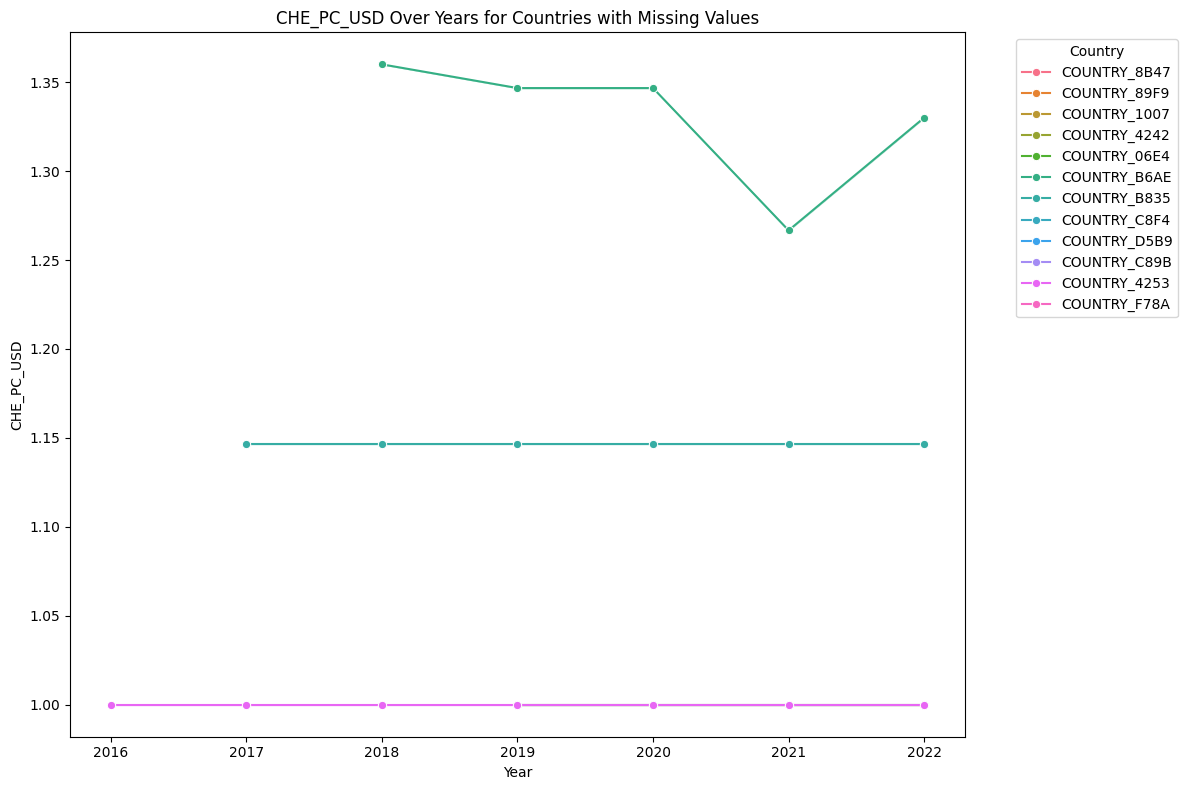

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

field = 'insurance_perc_che'

# Identify countries with at least one missing 'field'
countries_with_missing = countrydf[countrydf[field].isnull()]['country'].unique()

# Filter the dataframe for these countries
missing_che_pc_usd_df = countrydf[countrydf['country'].isin(countries_with_missing)]

# Plot 'field' over 'year' for these countries
plt.figure(figsize=(12, 8))
sns.lineplot(data=missing_che_pc_usd_df, x='year', y=field, hue='country', marker='o')

plt.title("CHE_PC_USD Over Years for Countries with Missing Values")
plt.xlabel("Year")
plt.ylabel("CHE_PC_USD")
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [107]:
countrydf.to_csv('../data/intermig/countrydf_uninputed.csv', index=False)